In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
guesthouse = pd.read_excel('Guesthouse..xls')
guesthouse.head(5)

,Name,Number of guests,Nacionality,Gender,Price,Price per night,Number of nights,Check-in,Check out,Year,Month,Months,Review,Rooms
0,Artur,1,Brazil,M,73.0,24.333333,3,2017-04-12,2017-04-15 00:00:00,2017,4,Apr,1,Blue Room
1,Jon,1,South korea,M,73.0,24.333333,3,2017-02-11,2017-02-14 00:00:00,2017,2,Feb,1,Blue Room
2,Kleber,1,Brazil,M,270.0,27.000000,10,2017-02-20,2017-03-02 00:00:00,2017,2,Feb,1,Blue Room
3,Judith,2,Germany,F,73.0,36.500000,2,2017-07-03,2017-07-05 00:00:00,2017,7,Jul,1,Double Room
4,Elisa Yuan,2,UK,F,44.0,44.000000,1,2017-04-08,2017-04-09 00:00:00,2017,4,Apr,0,Double Room


In [3]:
guesthouse.describe()

,Number of guests,Price,Price per night,Number of nights,Year,Month,Review
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,2.203636,139.056655,51.180956,2.876364,2017.440000,6.505455,0.338182
std,1.296537,162.132529,29.498074,2.509687,0.497292,3.112690,0.473953
min,1.000000,24.080000,12.500000,1.000000,2017.000000,1.000000,0.000000
25%,1.000000,60.195000,30.340000,1.000000,2017.000000,4.000000,0.000000
50%,2.000000,89.570000,40.770000,2.000000,2017.000000,7.000000,0.000000
75%,3.000000,151.105000,64.318333,3.000000,2018.000000,9.000000,1.000000
max,5.000000,1597.000000,153.024000,24.000000,2018.000000,12.000000,1.000000


In [4]:
guesthouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              275 non-null    object        
 1   Number of guests  275 non-null    int64         
 2   Nacionality       275 non-null    object        
 3   Gender            275 non-null    object        
 4   Price             275 non-null    float64       
 5   Price per night   275 non-null    float64       
 6   Number of nights  275 non-null    int64         
 7   Check-in          275 non-null    datetime64[ns]
 8   Check out         275 non-null    object        
 9   Year              275 non-null    int64         
 10  Month             275 non-null    int64         
 11  Months            275 non-null    object        
 12  Review            275 non-null    int64         
 13  Rooms             275 non-null    object        
dtypes: datetime64[ns](1), floa

In [5]:
guesthouse.corr()

,Number of guests,Price,Price per night,Number of nights,Year,Month,Review
Number of guests,1.000000,0.490452,0.893762,-0.016910,0.019019,-0.011128,0.000367
Price,0.490452,1.000000,0.460526,0.715281,0.049580,-0.005065,0.073998
Price per night,0.893762,0.460526,1.000000,-0.110605,-0.028138,0.038354,0.024732
Number of nights,-0.016910,0.715281,-0.110605,1.000000,-0.003041,-0.023740,0.130396
Year,0.019019,0.049580,-0.028138,-0.003041,1.000000,-0.585105,-0.587179
Month,-0.011128,-0.005065,0.038354,-0.023740,-0.585105,1.000000,0.227579
Review,0.000367,0.073998,0.024732,0.130396,-0.587179,0.227579,1.000000


In [6]:
# Let's check how many unique nacionalities?
guesthouse['Nacionality'].nunique()

41

Heat Map

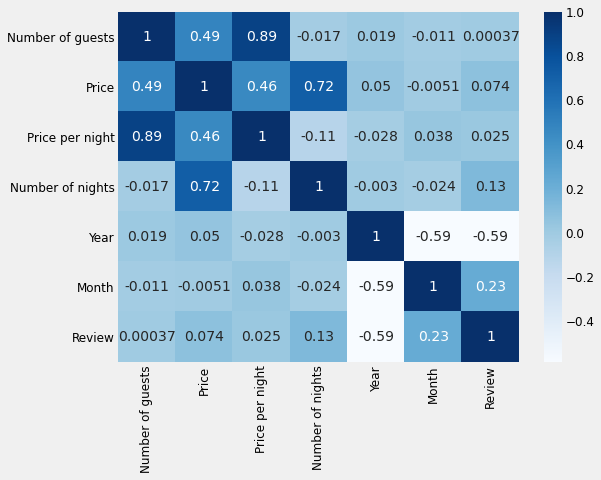

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(guesthouse.corr(),annot=True,cmap="Blues")
plt.show()